In [1]:
from numpy import linspace
import matplotlib.pyplot as plt

## 8.1. Using the law of mass action, write down four equations for the rate of changes of the four species, E, S, ES, and P.

For ease of writing, let e = [E], s = [S], c = [ES], and p = [P].

\begin{equation*}
\frac{ds}{dt} = k_{2}c - k_{1}se
\end{equation*}

\begin{equation*}
\frac{de}{dt} = (k_{2} + k_{3})c - k_{1}se
\end{equation*}

\begin{equation*}
\frac{dc}{dt} = k_{1}se - (k_{2} + k_{3})c
\end{equation*}

\begin{equation*}
\frac{dp}{dt} = k_{3}c
\end{equation*}


## 8.2. Write a code to numerically solve these four equations using the fourth-order Runge- Kutta method. For this exercise, assume that the initial concentration of E is 1 μM, the initial concentration of S is 10 μM, and the initial concentrations of ES and P are both 0. The rate constants are: k1=100/μM/min, k2=600/min, k3=150/min.

In [2]:
# Substrate differential equation "ds / dt = (a2 * c) - (a1*s*e)
def dsdt(s, t):
    a1 = 100 # replace k with a 
    a2 = 600
    c = 0
    e = 1
    return ((a2*c) - (a1*s*e))

s_plot = [] 
ts_RK4= []

# Finds value of t for a given s using step size h
# and initial value t0 at s0.
def s_rungeKutta(s0, t0, s, h):
    # Count number of iterations using step size or
    # step height h
    n = abs((int)((s0 - s)/h))
    # Iterate for number of iterations
    t = t0
    for i in range(1, n + 1):
        s_plot.append(s0); ts_RK4.append(t); 
        "Apply Runge Kutta Formulas to find next value of t"
        k1 = h * dsdt(s0, t)
        k2 = h * dsdt(s0 + 0.5 * h, t + 0.5 * k1)
        k3 = h * dsdt(s0 + 0.5 * h, t + 0.5 * k2)
        k4 = h * dsdt(s0 + h, t + k3)

        # Update next value of t
        t = t + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)

        # Update next value of s
        s0 = s0 + h
        print('%f \t %f \t %f' % (s0, t, dsdt(s0, t)))
    return t

s0 		 t 		 dsdt
9.000000 	 950.000000 	 -900.000000
8.000000 	 1800.000000 	 -800.000000
7.000000 	 2550.000000 	 -700.000000
6.000000 	 3200.000000 	 -600.000000
5.000000 	 3750.000000 	 -500.000000
4.000000 	 4200.000000 	 -400.000000
3.000000 	 4550.000000 	 -300.000000
2.000000 	 4800.000000 	 -200.000000
1.000000 	 4950.000000 	 -100.000000
0.000000 	 5000.000000 	 0.000000


Text(0, 0.5, 'time (min)')

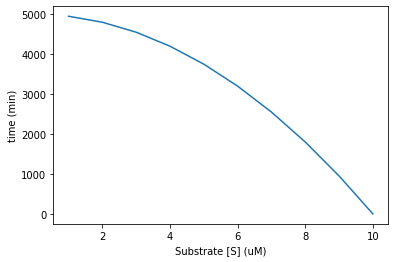

In [3]:
# Driver method
s0 = 10
t = 0
s = 0
h = -1
print('s0 \t\t t \t\t dsdt')
s_rungeKutta(s0, t, s, h)

plt.plot(s_plot, ts_RK4)
plt.xlabel("Substrate [S] (uM)")
plt.ylabel("time (min)")

In [4]:
# Enzyme differential equation "de / dt = ((a2 + a3)* c) - (a1*s*e)
def dedt(e, t):
    a1 = 100 # replace k with a 
    a2 = 600
    a3 = 150
    s = 10
    c = 0
    return (((a2+a3)*c) - (a1*s*e))

e_plot = [] 
te_RK4= []

# Finds value of t for a given s using step size h
# and initial value t0 at e0.
def e_rungeKutta(e0, t0, e, h):
    # Count number of iterations using step size or
    # step height h
    n = abs((int)((e0 - e)/h))
    # Iterate for number of iterations
    t = t0
    for i in range(1, n + 1):
        e_plot.append(e0); te_RK4.append(t)
        "Apply Runge Kutta Formulas to find next value of t"
        k1 = h * dedt(e0, t)
        k2 = h * dedt(e0 + 0.5 * h, t + 0.5 * k1)
        k3 = h * dedt(e0 + 0.5 * h, t + 0.5 * k2)
        k4 = h * dedt(e0 + h, t + k3)

        # Update next value of t
        t = t + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)

        # Update next value of e
        e0 = e0 + h
        print('%f \t %f \t %f' % (e0, t, dedt(e0, t)))
    return t

e0 		 t 		 dedt
0.900000 	 95.000000 	 -900.000000
0.800000 	 180.000000 	 -800.000000
0.700000 	 255.000000 	 -700.000000
0.600000 	 320.000000 	 -600.000000
0.500000 	 375.000000 	 -500.000000
0.400000 	 420.000000 	 -400.000000
0.300000 	 455.000000 	 -300.000000
0.200000 	 480.000000 	 -200.000000
0.100000 	 495.000000 	 -100.000000
0.000000 	 500.000000 	 -0.000000


Text(0, 0.5, 'time (min)')

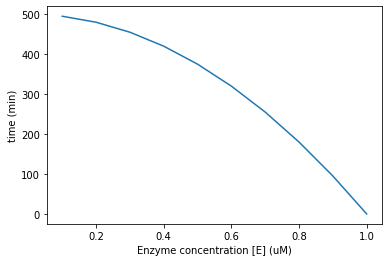

In [5]:
# Driver method
e0 = 1
t = 0
e = 0
h = -0.1

print('e0 \t\t t \t\t dedt')
e_rungeKutta(e0, t, e, h)


plt.plot(e_plot, te_RK4)
plt.xlabel("Enzyme concentration [E] (uM)")
plt.ylabel("time (min)")

In [6]:
# Composite differential equation "de / dt = ((a2 + a3)* c) - (a1*s*e)
def dcdt(c, t):
    a1 = 100 # replace k with a 
    a2 = 600
    a3 = 150
    s = 10
    e = 1
    return (((a1*s*e) - (a2 + a3)* c))

c_plot = [] 
tc_RK4= []

# Finds value of t for a given s using step size h
# and initial value t0 at c0.
def c_rungeKutta(c0, t0, c, h):
    # Count number of iterations using step size or
    # step height h
    n = abs((int)((c - c0)/h))
    # Iterate for number of iterations
    t = t0
    for i in range(1, n + 1):
        c_plot.append(c0); tc_RK4.append(t)
        "Apply Runge Kutta Formulas to find next value of t"
        k1 = h * dcdt(c0, t)
        k2 = h * dcdt(c0 + 0.5 * h, t + 0.5 * k1)
        k3 = h * dcdt(c0 + 0.5 * h, t + 0.5 * k2)
        k4 = h * dcdt(c0 + h, t + k3)

        # Update next value of t
        t = t + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)

        # Update next value of c
        c0 = c0 + h
        print('%f \t %f \t %f' % (c0, t, dcdt(c0, t)))
    return t


c0 		 t 		 dcdt
0.050000 	 49.062500 	 962.500000
0.100000 	 96.250000 	 925.000000
0.150000 	 141.562500 	 887.500000
0.200000 	 185.000000 	 850.000000
0.250000 	 226.562500 	 812.500000
0.300000 	 266.250000 	 775.000000
0.350000 	 304.062500 	 737.500000
0.400000 	 340.000000 	 700.000000
0.450000 	 374.062500 	 662.500000
0.500000 	 406.250000 	 625.000000
0.550000 	 436.562500 	 587.500000
0.600000 	 465.000000 	 550.000000
0.650000 	 491.562500 	 512.500000
0.700000 	 516.250000 	 475.000000
0.750000 	 539.062500 	 437.500000
0.800000 	 560.000000 	 400.000000
0.850000 	 579.062500 	 362.500000
0.900000 	 596.250000 	 325.000000
0.950000 	 611.562500 	 287.500000
1.000000 	 625.000000 	 250.000000
1.050000 	 636.562500 	 212.500000
1.100000 	 646.250000 	 175.000000
1.150000 	 654.062500 	 137.500000
1.200000 	 660.000000 	 100.000000
1.250000 	 664.062500 	 62.500000
1.300000 	 666.250000 	 25.000000


Text(0, 0.5, 'time (min)')

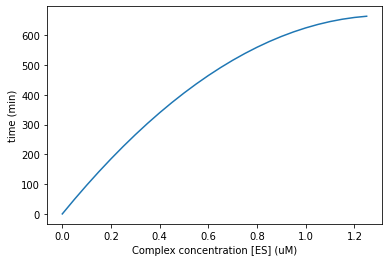

In [7]:
# Driver method
c0 = 0
t = 0
e = 1.3
h = 0.05

print('c0 \t\t t \t\t dcdt')
c_rungeKutta(c0, t, e, h)

plt.plot(c_plot, tc_RK4)
plt.xlabel("Complex concentration [ES] (uM)")
plt.ylabel("time (min)")

In [8]:
# Product differential equation "dp / dt = (a3 * c) 
def dpdt(p, t):
    a3 = 150 # replace k with a 
    c = 0
    return (a3*c)

p_plot = [] 
tp_RK4= []

# Finds value of t for a given s using step size h
# and initial value t0 at p0.
def p_rungeKutta(p0, t0, p, h):
    # Count number of iterations using step size or
    # step height h
    n = (int)((p - p0)/h)
    # Iterate for number of iterations
    t = t0
    for i in range(1, n + 1):
        p_plot.append(p0); tp_RK4.append(t)
        "Apply Runge Kutta Formulas to find next value of t"
        k1 = h * dpdt(p0, t)
        k2 = h * dpdt(p0 + 0.5 * h, t + 0.5 * k1)
        k3 = h * dpdt(p0 + 0.5 * h, t + 0.5 * k2)
        k4 = h * dpdt(p0 + h, t + k3)

        # Update next value of t
        t = t + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)

        # Update next value of p
        p0 = p0 + h
        print('%f \t %f \t %f' % (p0, t, dpdt(p0, t)))
    return t


p0 		 t 		 dpdt
0.100000 	 0.000000 	 0.000000
0.200000 	 0.000000 	 0.000000
0.300000 	 0.000000 	 0.000000
0.400000 	 0.000000 	 0.000000
0.500000 	 0.000000 	 0.000000
0.600000 	 0.000000 	 0.000000
0.700000 	 0.000000 	 0.000000
0.800000 	 0.000000 	 0.000000
0.900000 	 0.000000 	 0.000000
1.000000 	 0.000000 	 0.000000
1.100000 	 0.000000 	 0.000000
1.200000 	 0.000000 	 0.000000
1.300000 	 0.000000 	 0.000000
1.400000 	 0.000000 	 0.000000
1.500000 	 0.000000 	 0.000000
1.600000 	 0.000000 	 0.000000
1.700000 	 0.000000 	 0.000000
1.800000 	 0.000000 	 0.000000
1.900000 	 0.000000 	 0.000000
2.000000 	 0.000000 	 0.000000


Text(0, 0.5, 'time (min)')

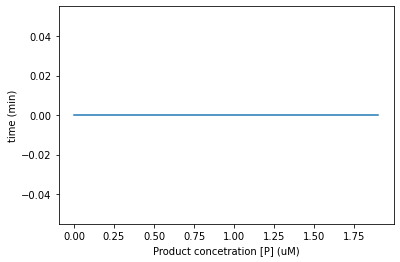

In [9]:
# Driver method
p0 = 0
t = 0
p = 2
h = 0.1

print('p0 \t\t t \t\t dpdt')
p_rungeKutta(p0, t, p, h)

plt.plot(p_plot, tp_RK4)
plt.xlabel("Product concetration [P] (uM)")
plt.ylabel("time (min)")

##  8.3. We define the velocity, V, of the enzymatic reaction to be the rate of change of the product P. Plot the velocity V as a function of the concentration of the substrate S. You should find that, when the concentrations of S are small, the velocity V increases approximately linearly. At large concentrations of S, however, the velocity V saturates to a maximum value, Vm. Find this value Vm from your plot.


We would be using Michaelis-Menten equation (3) to calculate and plot the initial velocity / substrate concentration graph. 
\begin{equation*}
v = \frac{V_{max} [S]}{K_{m} + [S]}
\end{equation*}

Since Vmax is the reaction velocity at saturating substrate concentration, it is equal to \begin{equation*} k_{3} [ES] \end{equation*} 
where S is not longer the limiting factor, and total number of enzymes is 
\begin{equation*} [ES] = [E_{T}]\end{equation*}
so
\begin{equation*}
V_{max} = k_{3} [E_{T}]
\end{equation*}

We also define KM in terms of the rate constants as follows:

\begin{equation*}
K_{m} = \frac{k_{2} + k_{3}}{k_{1}}
\end{equation*}


Text(0.5, 1.0, 'Michaelis-Menten Curve')

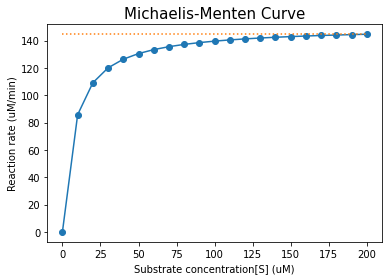

In [10]:
k1 = 100 
k2 = 600
k3 = 150
Et = 1 # initial Enzyme concentration = total enzyme concentration
 
def v0 (s, Vm, Km):
    return Vm*s / (Km + s)

sAxis = linspace(0,200,21)

Km = (k2+k3)/k1
Vm = k3 * Et
experimental_data = v0(sAxis, Vm, Km)

plt.plot(sAxis, experimental_data, marker='o')
plt.plot([sAxis[0],sAxis[-1]], [experimental_data[-1],experimental_data[-1]],':' )
plt.xlabel("Substrate concentration[S] (uM)")
plt.ylabel("Reaction rate (uM/min)")
plt.title('Michaelis-Menten Curve', fontsize=15)

In [11]:
v0(sAxis[-1], Vm, Km) # As the maximum [S] sets as sAxis[-1]

144.57831325301206

In [12]:
experimental_data[-1]

144.57831325301206

Answer: **Vmax from the plot** is approximately **145uM/min**